In [1]:
%run frontera_v3.py

# Rob

In [2]:

import scipy.stats as stats

import pandas as pd
from sklearn.datasets import make_blobs

import plotly.graph_objects as go

import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio

In [3]:

import scipy.stats as stats

import pandas as pd
from sklearn.datasets import make_blobs

import plotly.graph_objects as go

import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio
pio.renderers.default = 'iframe'

In [4]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 600, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1, 
        shuffle      = True, 
        random_state = 0
       )

In [5]:
fig = go.Figure(data=[go.Scatter(x=X[:, 0], y=X[:, 1],
                                   mode='markers', 
                                   marker=dict(
                                    size=6,
                                    color=y,                # set color to an array/list of desired values
                                    colorscale='picnic',   # choose a colorscale
                                    opacity=0.7)
                                  )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=0, r=0, b=0, t=10))
    
fig.show()

In [6]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [7]:
frontera.frontier()

In [8]:
frontera.plot_Vectors(0,1)

In [9]:
frontera.plot_frontera_2D(0,1)

In [10]:
frontera.plot_muestra_2D(0,1)

# Leo

In [11]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41, method='prototypes')

In [12]:
frontera.frontier()

Restricted license - for non-production use only - expires 2024-10-28


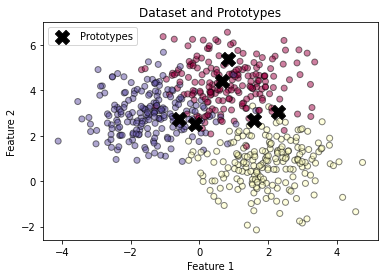

In [13]:
# Get the selected prototypes and their labels
prototypes = frontera.w_
prototype_labels = frontera.c_w_

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='X', s=200, label='Prototypes')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and Prototypes')

# Show the plot
plt.show()

In [14]:
frontera.w_

array([[-0.12555918,  2.50750047],
       [ 2.29008905,  3.02981707],
       [ 0.84256852,  5.38153113],
       [-0.59649552,  2.74256586],
       [ 0.66538391,  4.40118749],
       [ 1.60150153,  2.70172967]])

# LSH

In [15]:
frontera = Frontera(X,y,percentil_min=5, percentil_max=20, N_points_frontera=41, method='LSH')

In [16]:
frontera.frontier()

In [17]:
centroid_arrays = list(frontera.centroids.values())
centroid_arrays

[array([0.27036553, 3.05296157]),
 array([ 2.10514014, -0.29627529]),
 array([0.42840395, 2.81535597]),
 array([ 1.80998619, -1.03394769])]

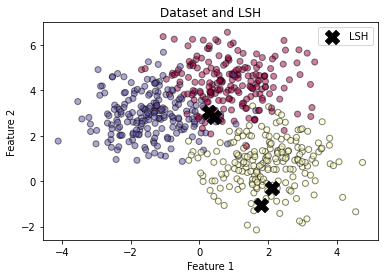

In [18]:
centroid_arrays = np.array(list(frontera.centroids.values()))

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(centroid_arrays[:, 0], centroid_arrays[:, 1], c='black', marker='X', s=200, label='LSH')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and LSH')

# Show the plot
plt.show()


# MNIST

In [ ]:
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten and transpose images
x_train_flat = x_train.reshape(x_train.shape[0], -1).T
# x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Add labels as an additional column vector
y_train_col = y_train.reshape(1, y_train.shape[0])
# y_test_col = y_test.reshape(1, y_test.shape[0])

train_data = np.vstack((x_train_flat, y_train_col))
# test_data = np.vstack((x_test_flat, y_test_col))


In [ ]:
frontera = Frontera(x_train_flat,y_train_col,percentil_min=5, percentil_max=20, N_points_frontera=41)

In [ ]:
frontera.frontier()